In [1]:
import numpy as np
import pandas as pd

In [28]:
# 原始轨迹数据
act_points = pd.read_csv('data/stay_one_community_by_cover.csv', parse_dates=['t_start', 't_end'])
act_points.head()

,pid,date,t_start,t_end,poi_id,longitude,latitude,community_id
0,12625796,20200416,2020-04-16 15:11:28,2020-04-16 17:23:07,4,114.133475,22.571633,2291
1,13483544,20200218,2020-02-18 09:03:24,2020-02-18 12:52:55,2,114.075262,22.537026,2291
2,13483544,20200428,2020-04-28 18:56:17,2020-04-28 22:17:08,12,114.048612,22.567884,2291
3,13483544,20200522,2020-05-22 18:30:00,2020-05-22 20:33:07,17,114.128282,22.569436,2291
4,13483544,20200502,2020-05-02 11:04:32,2020-05-02 11:35:48,17,114.128282,22.569436,2291


## 用于从平台上提取ptype并合并的代码

In [29]:
#按pid和t_start升序
act_points_sorted = act_points.sort_values(by=['pid', 't_start']).reset_index(drop=True)
act_points_sorted.head()

,pid,date,t_start,t_end,poi_id,longitude,latitude,community_id
0,117999,20200101,2020-01-01 00:12:42,2020-01-01 23:07:21,0,114.173201,22.640610,2291
1,117999,20200102,2020-01-02 00:04:02,2020-01-02 07:01:15,0,114.173201,22.640610,2291
2,117999,20200102,2020-01-02 07:55:20,2020-01-02 21:26:58,1,114.059819,22.654923,2291
3,117999,20200102,2020-01-02 22:00:40,2020-01-02 23:16:47,0,114.173201,22.640610,2291
4,117999,20200103,2020-01-03 00:47:55,2020-01-03 07:01:43,0,114.173201,22.640610,2291


In [9]:
act_points_sorted.to_csv('data/stay_one_community_sorted.csv',index=False)

In [3]:
act_points = pd.read_csv('data/stay_one_community_sorted.csv', parse_dates=['t_start', 't_end'])
#月份截断
act_points['month'] = np.floor(act_points['date']/100)
act_points.head()

,pid,date,t_start,t_end,poi_id,longitude,latitude,community_id
0,117999,20200101,2020-01-01 00:12:42,2020-01-01 23:07:21,0,114.173201,22.640610,2291
1,117999,20200102,2020-01-02 00:04:02,2020-01-02 07:01:15,0,114.173201,22.640610,2291
2,117999,20200102,2020-01-02 07:55:20,2020-01-02 21:26:58,1,114.059819,22.654923,2291
3,117999,20200102,2020-01-02 22:00:40,2020-01-02 23:16:47,0,114.173201,22.640610,2291
4,117999,20200103,2020-01-03 00:47:55,2020-01-03 07:01:43,0,114.173201,22.640610,2291


In [17]:
join_ptype = pd.read_csv('join_ptype_v1.csv', parse_dates=['t_start', 't_end'])
join_ptype = join_ptype.sort_values(by=['pid', 't_start']).reset_index(drop=True)
join_ptype.head()

,pid,poi_id,month,t_start,t_end,ptype
0,117999,0,202001,2020-01-01 00:12:00,2020-01-01 23:07:00,1
1,117999,0,202001,2020-01-02 00:04:00,2020-01-02 07:01:00,1
2,117999,1,202001,2020-01-02 07:55:00,2020-01-02 21:26:00,2
3,117999,0,202001,2020-01-02 22:00:00,2020-01-02 23:16:00,1
4,117999,0,202001,2020-01-03 00:47:00,2020-01-03 07:01:00,1


In [18]:
act_points['ptype'] = join_ptype['ptype']
act_points = act_points.drop(columns='month')
act_points.info()

In [25]:
act_points.to_csv('data/stay_one_community_with_ptype.csv',index=False)

## 增加week信息

In [33]:
#读取数据
filename = 'data/stay_one_community_with_ptype.csv'
act_points = pd.read_csv(filename,parse_dates=['t_start', 't_end'])
act_points['date'] = pd.to_datetime(act_points['date'],format='%Y%m%d')
act_points.head()

,pid,date,t_start,t_end,poi_id,longitude,latitude,community_id,ptype
0,117999,2020-01-01,2020-01-01 00:12:42,2020-01-01 23:07:21,0,114.173201,22.640610,2291,1
1,117999,2020-01-02,2020-01-02 00:04:02,2020-01-02 07:01:15,0,114.173201,22.640610,2291,1
2,117999,2020-01-02,2020-01-02 07:55:20,2020-01-02 21:26:58,1,114.059819,22.654923,2291,2
3,117999,2020-01-02,2020-01-02 22:00:40,2020-01-02 23:16:47,0,114.173201,22.640610,2291,1
4,117999,2020-01-03,2020-01-03 00:47:55,2020-01-03 07:01:43,0,114.173201,22.640610,2291,1


In [36]:
# 增加周编号和周内编号
act_points['week'] = [data.week for data in act_points['date']]
act_points['weekday'] = [data.weekday() for data in act_points['date']]

In [37]:
act_points.head(20)

,pid,date,t_start,t_end,poi_id,longitude,latitude,community_id,ptype,week,weekday
0,117999,2020-01-01,2020-01-01 00:12:42,2020-01-01 23:07:21,0,114.173201,22.640610,2291,1,1,2
1,117999,2020-01-02,2020-01-02 00:04:02,2020-01-02 07:01:15,0,114.173201,22.640610,2291,1,1,3
2,117999,2020-01-02,2020-01-02 07:55:20,2020-01-02 21:26:58,1,114.059819,22.654923,2291,2,1,3
3,117999,2020-01-02,2020-01-02 22:00:40,2020-01-02 23:16:47,0,114.173201,22.640610,2291,1,1,3
4,117999,2020-01-03,2020-01-03 00:47:55,2020-01-03 07:01:43,0,114.173201,22.640610,2291,1,1,4
5,117999,2020-01-03,2020-01-03 07:54:02,2020-01-03 15:37:11,1,114.059819,22.654923,2291,2,1,4
6,117999,2020-01-03,2020-01-03 15:40:11,2020-01-03 17:54:30,1,114.059819,22.654923,2291,2,1,4
7,117999,2020-01-03,2020-01-03 18:43:29,2020-01-03 22:58:50,0,114.173201,22.640610,2291,1,1,4
8,117999,2020-01-04,2020-01-04 00:53:18,2020-01-04 17:25:27,0,114.173201,22.640610,2291,1,1,5
9,117999,2020-01-04,2020-01-04 17:25:29,2020-01-04 18:17:57,11,114.179686,22.637079,2291,0,1,5


In [38]:
# 保存数据
act_points.to_csv('data/stay_one_community_with_ptype_week.csv',index=False)

## 扩展活动类型

In [39]:
#读取数据
filename = 'data/stay_one_community_with_ptype_week.csv'
act_points = pd.read_csv(filename,parse_dates=['t_start', 't_end'])
act_points['date'] = pd.to_datetime(act_points['date'],format='%Y-%m-%d')
act_points.head()

,pid,date,t_start,t_end,poi_id,longitude,latitude,community_id,ptype,week,weekday
0,117999,2020-01-01,2020-01-01 00:12:42,2020-01-01 23:07:21,0,114.173201,22.640610,2291,1,1,2
1,117999,2020-01-02,2020-01-02 00:04:02,2020-01-02 07:01:15,0,114.173201,22.640610,2291,1,1,3
2,117999,2020-01-02,2020-01-02 07:55:20,2020-01-02 21:26:58,1,114.059819,22.654923,2291,2,1,3
3,117999,2020-01-02,2020-01-02 22:00:40,2020-01-02 23:16:47,0,114.173201,22.640610,2291,1,1,3
4,117999,2020-01-03,2020-01-03 00:47:55,2020-01-03 07:01:43,0,114.173201,22.640610,2291,1,1,4


In [6]:
# 生成月份标签
act_points['month'] = [data.month for data in act_points['date']]

In [7]:
#原始ptype：0-到访，1-居住，2-工作，3-出行，
#为了wft，令0-居住（基点），1-出行，2-工作，3-其他
dict_ = {0:3, 1:0, 2:2}
act_points['ptype'] = act_points['ptype'].map(dict_)

In [30]:
len(act_points)

44146

In [ ]:
# 删除没有家类型的月份

In [22]:
#将原始活动数据转换成描述活动的特征向量用于聚类分析
def transform_activity(acts):

    duration_times = []
    happen_times = []

    home_distances = []
    work_distances = []
    
    
    acts_ptype0 = acts.query('ptype==0')  #用于提取家坐标
    home_loc = acts_ptype0.groupby(['pid','month']).agg(longitude = ('longitude','mean'),
                                                  latitude = ('latitude','mean')).reset_index()
    
    acts_ptype2 = acts.query('ptype==2')  #用于提取工作地坐标,如果没工作地，用家代替
    work_loc = acts_ptype2.groupby(['pid','month']).agg(longitude = ('longitude','mean'),
                                                  latitude = ('latitude','mean')).reset_index()
    

    #家和工作地的活动也同样构建特征，后面聚类不用就是了
    
    for index in range(len(acts)):
        data = acts.iloc[index,:]
        #计算活动开始时间和持续时间
        st_time = data['t_start'].hour*60+data['t_start'].minute
        happen_times.append(st_time)  #发生时间选择为当天时间（第x分钟）
        duration_time = round((data['t_end']-data['t_start']).total_seconds()/60)
        duration_times.append(duration_time)             #计算持续时间
        
        # 计算离家距离和离工作地距离
        pid = data['pid']; month = data['month']
        home = home_loc.query(f'pid=={pid}&month=={month}')
        work = work_loc.query(f'pid=={pid}&month=={month}')
        # 如果work为空（无工作地），用home作为work
        if not bool(len(work)):
            work = home
        
        home_lon = float(np.mean(home.longitude))
        home_lat = float(np.mean(home.latitude))
        lon = data['longitude']
        lat = data['latitude']
        #计算距家距离
        home_distance = geodesic((lat, lon), (home_lat, home_lon)).km
        home_distances.append(home_distance)
        
        work_lon = float(np.mean(work.longitude))
        work_lat = float(np.mean(work.latitude))
        #计算距工作地距离
        work_distance = geodesic((lat, lon), (work_lat, work_lon)).km
        work_distances.append(work_distance)
        
    feature = {
            'happen_time': happen_times,
            'duration_time': duration_times,
            'home_distance': home_distances,
            'work_distance': work_distances
            }
    
    features = pd.DataFrame(feature)
    #frame.to_csv(filename_1, index = False, sep=',')  #False指不引入行索引

    #print("已将原始活动数据转换成描述成描述活动的向量，并将数据存入： ")
    #print(filename_1)
    return features


In [23]:
# 生成活动特征
from geopy.distance import geodesic
act_feature = transform_activity(act_points)

ValueError: Point coordinates must be finite. (nan, nan, 0.0) has been passed as coordinates.

In [24]:
acts_ptype0 = act_points.query('ptype==0')
home_loc = acts_ptype0.groupby(['pid','month']).agg(longitude = ('longitude','mean'),
                                                  latitude = ('latitude','mean')).reset_index()

In [25]:
len(home_loc)

565

In [29]:
home_loc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 565 entries, 0 to 564
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pid        565 non-null    int64  
 1   month      565 non-null    int64  
 2   longitude  565 non-null    float64
 3   latitude   565 non-null    float64
dtypes: float64(2), int64(2)
memory usage: 17.8 KB


In [44]:
# 将特征并入dataframe
act_points = pd.concat([act_points,act_feature], axis=1)

In [45]:
act_points.head()

,pid,date,t_start,t_end,poi_id,longitude,latitude,community_id,ptype,week,weekday,month,happen_time,duration_time,home_distance,work_distance
0,117999,2020-01-01,2020-01-01 00:12:42,2020-01-01 23:07:21,0,114.173201,22.640610,2291,0,1,2,1,12,1375,5.853701e-12,1.176146e+01
1,117999,2020-01-02,2020-01-02 00:04:02,2020-01-02 07:01:15,0,114.173201,22.640610,2291,0,1,3,1,4,417,5.853701e-12,1.176146e+01
2,117999,2020-01-02,2020-01-02 07:55:20,2020-01-02 21:26:58,1,114.059819,22.654923,2291,2,1,3,1,475,812,1.176146e+01,1.023036e-11
3,117999,2020-01-02,2020-01-02 22:00:40,2020-01-02 23:16:47,0,114.173201,22.640610,2291,0,1,3,1,1320,76,5.853701e-12,1.176146e+01
4,117999,2020-01-03,2020-01-03 00:47:55,2020-01-03 07:01:43,0,114.173201,22.640610,2291,0,1,4,1,47,374,5.853701e-12,1.176146e+01


### 选择ptype=3的数据进行活动类型聚类

In [72]:
# 提取ptype=3的记录
act_points_3 = act_points.query('ptype==3')
act_feature_3 = act_points_3[['happen_time','duration_time','home_distance','work_distance']]

In [73]:
# 对特征要进行“标准化”（z-score）
from sklearn import preprocessing

Standardize = preprocessing.StandardScaler()
Standardize = Standardize.fit_transform(act_feature_3)
feature_std = pd.DataFrame(Standardize,index=act_feature_3.index,columns=act_feature_3.columns)

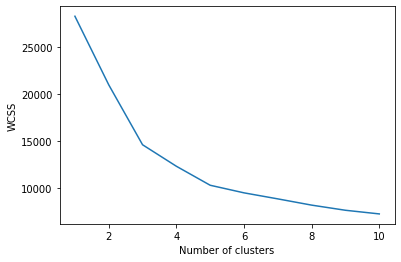

In [62]:
# k-means聚类，wcss确定簇数
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
wcss = [] 
for i in range(1, 11): 
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(feature_std) 
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') 
plt.show()

In [74]:
kmeans = KMeans(n_clusters = 5, init = "k-means++", random_state = 42)
y_kmeans = kmeans.fit_predict(feature_std)
act_points_3['ptype'] = act_points_3['ptype'] + y_kmeans

<ipython-input-74-2ef76edbe3af>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [78]:
# 更新数据表
act_points.loc[act_points_3.index,('ptype')] = act_points_3['ptype']

In [81]:
#保存数据
act_points.to_csv('data/stay_one_community_with_7ptype_week.csv',index=False)

# 为提升聚类效果而进行的改进

## 1. 更换数据源

In [51]:
# 19年全年原始轨迹数据
act_points2019 = pd.read_csv('data/activity_extraction.csv', parse_dates=['t_start', 't_end'])
act_points2019['date'] = pd.to_datetime(act_points2019['date'],format='%Y%m%d')
act_points2019.head()

,pid,date,t_start,t_end,poi_id,chinese,math,community_id,ptype
0,8398495,2019-08-22,2019-08-22 19:38:37,2019-08-22 21:44:42,7,11435.112981,2281.998446,2291,0
1,8398495,2019-08-30,2019-08-30 00:07:44,2019-08-30 01:01:11,7,11435.112981,2281.998446,2291,0
2,8595744,2019-03-17,2019-03-17 11:34:33,2019-03-17 14:11:04,20,11444.387078,2291.469309,2291,0
3,8716079,2019-05-30,2019-05-30 07:29:38,2019-05-30 08:11:34,14,11428.658823,2277.273980,2291,0
4,8716079,2019-05-09,2019-05-09 07:43:35,2019-05-09 09:01:35,14,11428.658823,2277.273980,2291,0


In [52]:
# 还原经纬度信息
act_points2019['longitude'] = (act_points2019['chinese']-20)/100
act_points2019['latitude'] = (act_points2019['math']-20)/100
act_points2019.drop(columns = ['chinese','math'],inplace=True)
print(len(act_points2019))

73325


In [53]:
# 删除空值
act_points2019 = act_points2019.dropna(axis=0, how='any')
print(len(act_points2019))

73300


In [54]:
# 增加周编号和周内编号
act_points2019['week'] = [data.week for data in act_points2019['date']]
act_points2019['weekday'] = [data.weekday() for data in act_points2019['date']]

In [55]:
#  提取非节假日的星期
from datetime import datetime
voc_begin = [datetime(2019,1,1),datetime(2019,1,28),datetime(2019,4,1),datetime(2019,4,29),
             datetime(2019,6,3),datetime(2019,9,9),datetime(2019,9,30)]
voc_end = [datetime(2019,1,6),datetime(2019,2,10),datetime(2019,4,7),datetime(2019,5,5),
          datetime(2019,6,9),datetime(2019,9,15),datetime(2019,10,13)]

for i in range(len(voc_begin)):
    dt1 = voc_begin[i]
    dt2 = voc_end[i]
    act_points2019 = act_points2019.drop(act_points2019[(act_points2019.date >= dt1) & (act_points2019.date <= dt2)].index)

In [56]:
act_points2019.head()

,pid,date,t_start,t_end,poi_id,community_id,ptype,longitude,latitude,week,weekday
0,8398495,2019-08-22,2019-08-22 19:38:37,2019-08-22 21:44:42,7,2291,0,114.151130,22.619984,34,3
1,8398495,2019-08-30,2019-08-30 00:07:44,2019-08-30 01:01:11,7,2291,0,114.151130,22.619984,35,4
2,8595744,2019-03-17,2019-03-17 11:34:33,2019-03-17 14:11:04,20,2291,0,114.243871,22.714693,11,6
3,8716079,2019-05-30,2019-05-30 07:29:38,2019-05-30 08:11:34,14,2291,0,114.086588,22.572740,22,3
4,8716079,2019-05-09,2019-05-09 07:43:35,2019-05-09 09:01:35,14,2291,0,114.086588,22.572740,19,3


In [59]:
# 先暂时用下半年数据进行分析（假期少）
act_points2019_half = act_points2019.loc[act_points2019['date']>datetime(2019,5,1)]

In [63]:
#按pid和t_start升序
act_points2019_half = act_points2019_half.sort_values(by=['pid', 't_start']).reset_index(drop=True)
act_points2019_half.head()

,pid,date,t_start,t_end,poi_id,community_id,ptype,longitude,latitude,week,weekday
0,90221,2019-05-06,2019-05-06 07:28:00,2019-05-06 22:51:56,1,2291,2,114.185092,22.651382,19,0
1,90221,2019-05-07,2019-05-07 00:52:01,2019-05-07 11:44:26,0,2291,1,114.174066,22.640383,19,1
2,90221,2019-05-07,2019-05-07 12:09:41,2019-05-07 13:39:58,0,2291,1,114.174066,22.640383,19,1
3,90221,2019-05-07,2019-05-07 13:41:28,2019-05-07 16:42:16,1,2291,2,114.185092,22.651382,19,1
4,90221,2019-05-07,2019-05-07 16:43:47,2019-05-07 23:14:57,0,2291,1,114.174066,22.640383,19,1


In [64]:
act_point2019_half.to_csv('data/stay_one_community_2019.csv',index=False)

In [65]:
act_point2019_half.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44146 entries, 0 to 44145
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   pid           44146 non-null  int64         
 1   date          44146 non-null  datetime64[ns]
 2   t_start       44146 non-null  datetime64[ns]
 3   t_end         44146 non-null  datetime64[ns]
 4   poi_id        44146 non-null  int64         
 5   community_id  44146 non-null  int64         
 6   ptype         44146 non-null  int64         
 7   longitude     44146 non-null  float64       
 8   latitude      44146 non-null  float64       
 9   week          44146 non-null  int64         
 10  weekday       44146 non-null  int64         
dtypes: datetime64[ns](3), float64(2), int64(6)
memory usage: 3.7 MB


In [3]:
act_points2019_half = pd.read_csv('data/stay_one_community_2019.csv', parse_dates=['t_start', 't_end'])
act_points2019_half['date'] = pd.to_datetime(act_points2019_half['date'],format='%Y-%m-%d')
act_points2019_half.head()

,pid,date,t_start,t_end,poi_id,community_id,ptype,longitude,latitude,week,weekday
0,90221,2019-05-06,2019-05-06 07:28:00,2019-05-06 22:51:56,1,2291,2,114.185092,22.651382,19,0
1,90221,2019-05-07,2019-05-07 00:52:01,2019-05-07 11:44:26,0,2291,1,114.174066,22.640383,19,1
2,90221,2019-05-07,2019-05-07 12:09:41,2019-05-07 13:39:58,0,2291,1,114.174066,22.640383,19,1
3,90221,2019-05-07,2019-05-07 13:41:28,2019-05-07 16:42:16,1,2291,2,114.185092,22.651382,19,1
4,90221,2019-05-07,2019-05-07 16:43:47,2019-05-07 23:14:57,0,2291,1,114.174066,22.640383,19,1


In [5]:
act_points = act_points2019_half